## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

random.seed(42)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
combined_data


# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
mouse_data = combined_data["Mouse ID"].value_counts()
mouse_data

g989    13
g497    10
m601    10
q633    10
a685    10
        ..
t573     1
u153     1
l872     1
n482     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_data_duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
combined_data_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Set Mouse ID as the index
combined_data = combined_data.set_index("Mouse ID")
combined_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = (combined_data.drop('g989', axis=0))
clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()
# clean_df.dtypes

Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [8]:
# print(clean_df.head())

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
average_drug_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
average_drug_regimen.head()
median_drug_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median_drug_regimen.head()
variance_drug_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variance_drug_regimen.head()
std_drug_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_drug_regimen.head()
sem_drug_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sem_drug_regimen.head()
# Assemble the resulting series into a single summary dataframe.


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [11]:
summary_stats_df = pd.DataFrame({"Drug Average": average_drug_regimen,
                                "Drug Median": median_drug_regimen,
                                "Drug Variance": variance_drug_regimen,
                                "Drug Standard Deviation": std_drug_regimen,
                                "Standard Error of the Mean (SEM)": sem_drug_regimen})
summary_stats_df

,Drug Average,Drug Median,Drug Variance,Drug Standard Deviation,Standard Error of the Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average_clean = clean_df["Tumor Volume (mm3)"].mean()
# average_clean
median_clean = clean_df["Tumor Volume (mm3)"].median()
# median_clean
variance_clean = clean_df["Tumor Volume (mm3)"].var()
# variance_clean
std_clean = clean_df["Tumor Volume (mm3)"].std()
# std_clean
sem_clean = clean_df["Tumor Volume (mm3)"].sem()
sem_clean
# Using the aggregation method, produce the same summary statistics in a single line
clean_df_agg = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
clean_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

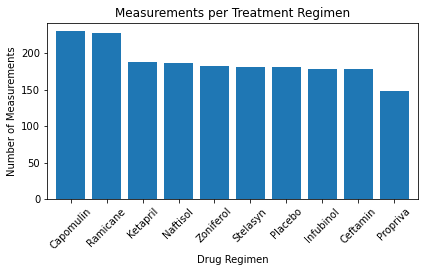

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = clean_df['Drug Regimen'].value_counts()
regimen_count.plot(kind="bar", width=0.80)

# Assign title and labels for x- and y-axes. Rotate x-axis labels 45 degrees and use tight layout.
plt.title("Measurements per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

In [14]:
# Identify the x-axis values
regimens = clean_df['Drug Regimen'].unique()
regimen_count.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

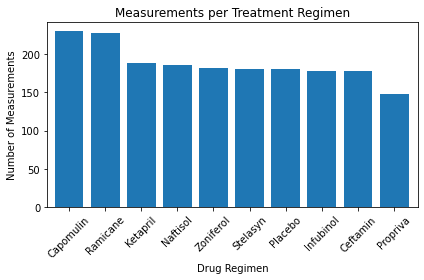

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(x = regimen_count.index.values, height = regimen_count.values)
plt.xticks(rotation=45)

# Assign title and labels for x- and y-axes. Rotate x-axis labels 45 degrees and use tight layout.
plt.title("Measurements per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlim(-0.60, len(regimens)-0.35)
plt.tight_layout()
# plt.show()

In [16]:
# Create a group based on 'Sex'
gender = clean_df.groupby('Sex')

# Count how many times each gender appears in the group
count_gender = gender['Sex'].count()

count_gender


Sex
Female    922
Male      958
Name: Sex, dtype: int64

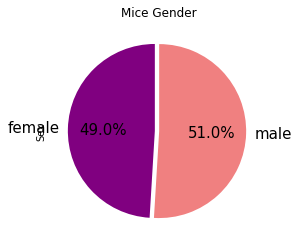

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["purple","lightcoral"]
explode = [0.05,0]
count_chart_pandas = count_gender.plot(kind='pie', colors=colors, autopct='%.1f%%', explode=explode, labels=['female','male'], title=['Mice Gender'], startangle=90, subplots=True, fontsize=15)

plt.show()



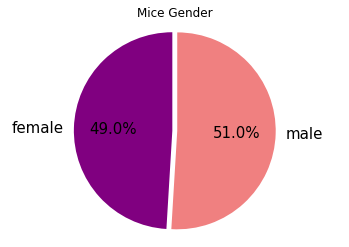

In [18]:
colors = ["purple","lightcoral"]
textprops={"fontsize":15}
explode = [0.05,0]

plt.pie(count_gender, colors=colors, explode=explode, autopct='%.1f%%', labels=['female','male'], textprops=textprops, startangle=90)
plt.axis('equal')
plt.title("Mice Gender")

plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = clean_df.groupby('Mouse ID')["Timepoint"].max()
final_tumor_volume = final_tumor_volume.reset_index()
final_tumor_volume.head()

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [20]:
merge_df = pd.merge(final_tumor_volume, clean_df, how='left', on=['Mouse ID', 'Timepoint'])
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# drug_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merge_df.loc[merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset
    tumor_volume_list.append(final_tumor_volume)   
        
    # Determine outliers using upper and lower bounds
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

#     print(f"The lower quartile of drug regimens is: {lowerq}")
#     print(f"The upper quartile of drug regimens is: {upperq}")
#     print(f"The interquartile range of drug regimens is: {iqr}")
#     print(f"The the median of drug regimens is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    tumor_outlier = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
#     print(f"Drug {drug} {tumor_outlier}")
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.")
#     plt.show()

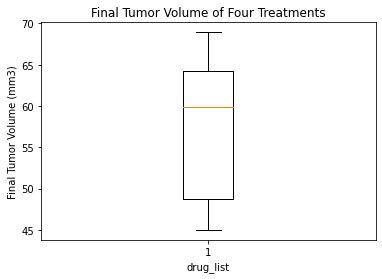

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(final_tumor_volume)
plt.title('Final Tumor Volume of Four Treatments')
plt.xlabel('drug_list')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

# drug_box_plot = pd.DataFrame("Final Tumor Volume")

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
